## Import libs, set paths and load params

In [1]:
import os
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "../src")

import auxilary_functions as f

## Convert raw data to adjacency matrices

In [2]:
#ecoli
df = f.read_ecoli_network("../data/ori/ecoli/network_tf_gene.txt")
edges = df[[1, 3]]
edges.columns = ["tf", "tg"]
edges.tf = edges.tf.apply(lambda x: x.lower())
edges.tg = edges.tg.apply(lambda x: x.lower())
nodes = sorted(np.unique(np.concatenate((edges.tf.unique(), edges.tg.unique()))))
nodes = pd.DataFrame(data=range(len(nodes)), index=nodes, columns=["idx"])
edges_ = edges.join(nodes, on="tf").join(nodes, on="tg", lsuffix="_tf", rsuffix="_tg")
np_edges = edges_[["idx_tg", "idx_tf"]].values
interaction_matrix_ecoli = f.build_Tnet(np_edges, len(nodes))

In [13]:
def calculate_k_nearest_neighbors(networkx_graph):
    import networkx as nx
    
    G_real = nx.DiGraph(networkx_graph.T)
    x_values = []
    y_values = []
    degree_connectivity = nx.k_nearest_neighbors(G_real)
    degree_connectivity = dict(sorted(degree_connectivity.items()))
                
    for k, v in degree_connectivity.items():
        x_values.append(k)
        y_values.append(v)

    x_values = np.array(x_values)
    y_values = np.array(y_values)
    
    #from matplotlib import pyplot as plt
    #plt.plot(np.log10(x_values/y_values))
    #print(1-f.corruption_score(interaction_matrix_ecoli, interaction_matrix_ecoli_shuffled))
    
    #print(nx.degree_pearson_correlation_coefficient(G))
    #print(nx.average_clustering(G))
    
    #from matplotlib import pyplot as plt
    
    return np.log10(x_values), np.log10(y_values)

In [14]:
def degree_corrrelation_real_vs_shuffled(interaction_matrix):
    """
    Requires adjacency matrix
    Returns knn(k) function for real networks vs shuffled
    """
    import pandas as pd
    
    #calculate knn for real network
    k_values_real, knn_values_real = calculate_k_nearest_neighbors(interaction_matrix_ecoli.T)
    
    #create pandas df
    knn_df = {'k_values':k_values_real,
        'knn_values':knn_values_real,
         'type': 'original'}
    knn_df = pd.DataFrame(knn_df)
    
    #calculate knn for shuffled networks
    for _ in range(10):
        interaction_matrix_ecoli_shuffled = f.get_shuffled_matrix(interaction_matrix_ecoli.T, 80000)
        k_values_shuffled, knn_values_shuffled = calculate_k_nearest_neighbors(interaction_matrix_ecoli_shuffled)
        
        knn_df_shuffled = {'k_values':k_values_shuffled,
        'knn_values':knn_values_shuffled,
         'type': 'shuffled'}
        knn_df_shuffled = pd.DataFrame(knn_df_shuffled)
        
        knn_df = knn_df.append(knn_df_shuffled)
        
        knn_df['type'] = knn_df['type'].astype('category')
        
    return knn_df

In [91]:
def return_two_df_ori_vs_shuffled(interaction_matrix):
    test_df = degree_corrrelation_real_vs_shuffled(interaction_matrix)
    test_df = test_df.replace([np.inf, -np.inf], np.nan)
    
    original_df = test_df[test_df['type'] == 'original']
    
    shuffled_df = test_df[test_df['type'] == 'shuffled'].groupby(['k_values']).agg(np.mean).unstack(0).reset_index()
    shuffled_df.columns = ['whatever', 'k_values', 'knn_values']
    
    return original_df, shuffled_df

In [92]:
#test_df = degree_corrrelation_real_vs_shuffled(interaction_matrix_ecoli)

In [16]:
#test_df = test_df.replace([np.inf, -np.inf], np.nan)

In [88]:
#original_df = test_df[test_df['type'] == 'original']
#original_df.plot.scatter(x='k_values', y='knn_values')

In [89]:
#shuffled_df = test_df[test_df['type'] == 'shuffled'].groupby(['k_values']).agg(np.mean).unstack(0).reset_index()
#shuffled_df.columns = ['whatever', 'k_values', 'knn_values']
#shuffled_df.plot.scatter(x='k_values', y='knn_values')

In [94]:
df1, df2 = return_two_df_ori_vs_shuffled(interaction_matrix_ecoli)

In [ ]:
#yeast
edges = pd.read_csv("../data/ori/yeast/tnet.txt", sep="\t")
nodes = sorted(np.unique(np.concatenate((edges.Tf.unique(), edges.Tg.unique()))))
nodes = pd.DataFrame(data=range(len(nodes)), index=nodes, columns=["idx"])
edges_ = edges.join(nodes, on="Tf").join(nodes, on="Tg", lsuffix="_tf", rsuffix="_tg")
np_edges = edges_[["idx_tg", "idx_tf"]].values
interaction_matrix_yeast = f.build_Tnet(np_edges, len(nodes))

In [ ]:
df3, df4 = return_two_df_ori_vs_shuffled(interaction_matrix_yeast)

In [ ]:
#mouse
edges = pd.read_csv(("../data/ori/trrust/trrust_rawdata.mouse.tsv"), sep="\t", header=None)[[0, 1]]
edges.columns = ["Tf", "Tg"]
nodes = sorted(np.unique(np.concatenate((edges.Tf.unique(), edges.Tg.unique()))))
nodes = pd.DataFrame(data=range(len(nodes)), index=nodes, columns=["idx"])
edges_ = edges.join(nodes, on="Tf").join(nodes, on="Tg", lsuffix="_tf", rsuffix="_tg")
np_edges = edges_[["idx_tg", "idx_tf"]].values
interaction_matrix_mouse = f.build_Tnet(np_edges, len(nodes))

In [116]:
df5, df6 = return_two_df_ori_vs_shuffled(interaction_matrix_mouse)

In [117]:
#human
edges = pd.read_csv(("../data/ori/trrust/trrust_rawdata.human.tsv"), sep="\t", header=None)[[0, 1]]
edges.columns = ["Tf", "Tg"]
nodes = sorted(np.unique(np.concatenate((edges.Tf.unique(), edges.Tg.unique()))))
nodes = pd.DataFrame(data=range(len(nodes)), index=nodes, columns=["idx"])
edges_ = edges.join(nodes, on="Tf").join(nodes, on="Tg", lsuffix="_tf", rsuffix="_tg")
np_edges = edges_[["idx_tg", "idx_tf"]].values
interaction_matrix_human = f.build_Tnet(np_edges, len(nodes))

In [118]:
df7, df8 = return_two_df_ori_vs_shuffled(interaction_matrix_human)

In [111]:
# from matplotlib.pyplot import figure
# plt.rcParams.update({'font.size': 24})
# figure(figsize=(16, 12), dpi=80)

# df1, df2 = return_two_df_ori_vs_shuffled(interaction_matrix_ecoli)
# ax = df1.plot(kind='scatter', x='k_values', y='knn_values', color = 'Blue', style="o", s=100, label = 'Original', figsize=(10,10), xlabel = 'k values', ylabel = 'knn(k) values')

# df2.plot(kind='scatter', x='k_values', y='knn_values', color = 'Red', label = 'Shuffled', style="o", s=100, ax=ax, xlabel = '$k$', ylabel = '$knn(k)$')

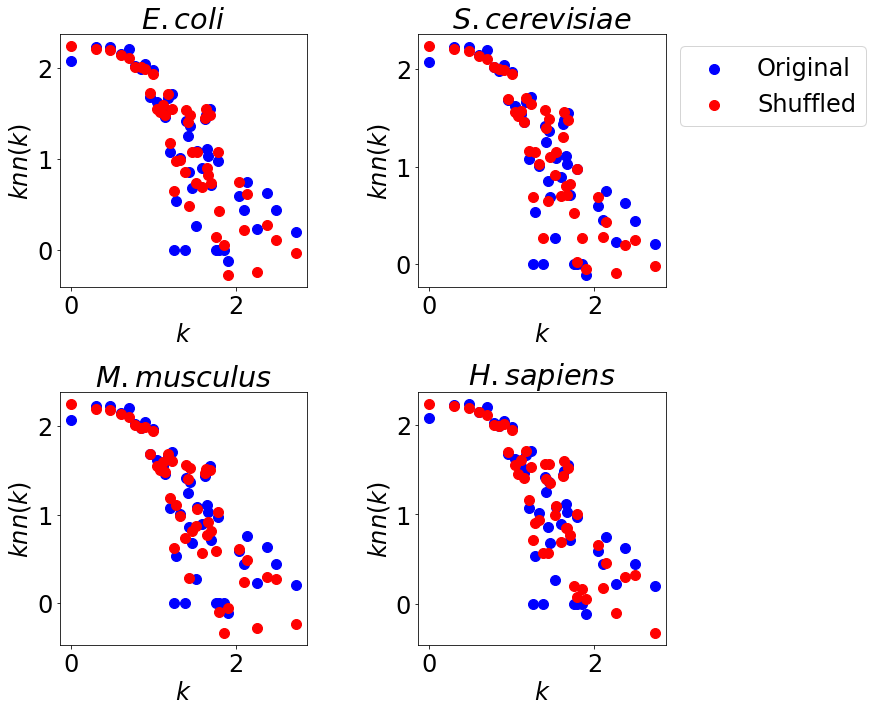

In [123]:
plt.rcParams.update({'font.size': 24})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
fig.tight_layout(pad=0.07)

df1.plot(kind='scatter', x='k_values', y='knn_values', color = 'Blue', style="o", s=100, label = 'Original', figsize=(10,10), xlabel = 'k values', ylabel = 'knn(k) values', ax=ax1)
df2.plot(kind='scatter', x='k_values', y='knn_values', color = 'Red', label = 'Shuffled', style="o", s=100, ax=ax1, xlabel = '$k$', ylabel = '$knn(k)$', title = '$E. coli$')
ax1.legend(bbox_to_anchor=(3.3, 1.0))

df3.plot(kind='scatter', x='k_values', y='knn_values', color = 'Blue', style="o", s=100, label = 'Original', figsize=(10,10), xlabel = 'k values', ylabel = 'knn(k) values', ax=ax2, legend=None)
df4.plot(kind='scatter', x='k_values', y='knn_values', color = 'Red', label = 'Shuffled', style="o", s=100, ax=ax2, xlabel = '$k$', ylabel = '$knn(k)$', title = '$S. cerevisiae$', legend=None)

df5.plot(kind='scatter', x='k_values', y='knn_values', color = 'Blue', style="o", s=100, label = 'Original', figsize=(10,10), xlabel = 'k values', ylabel = 'knn(k) values', ax=ax3, legend=None)
df6.plot(kind='scatter', x='k_values', y='knn_values', color = 'Red', label = 'Shuffled', style="o", s=100, ax=ax3, xlabel = '$k$', ylabel = '$knn(k)$', title = '$M. musculus$', legend=None)

df7.plot(kind='scatter', x='k_values', y='knn_values', color = 'Blue', style="o", s=100, label = 'Original', figsize=(10,10), xlabel = 'k values', ylabel = 'knn(k) values', ax=ax4, legend=None)
df8.plot(kind='scatter', x='k_values', y='knn_values', color = 'Red', label = 'Shuffled', style="o", s=100, ax=ax4, xlabel = '$k$', ylabel = '$knn(k)$', title = '$H. sapiens$', legend=None)

os.chdir('../results/figures/')
plt.savefig("figureS0.svg")
plt.savefig("figureS0.png")

In [112]:
#yeast
edges = pd.read_csv("../data/ori/yeast/tnet.txt", sep="\t")
nodes = sorted(np.unique(np.concatenate((edges.Tf.unique(), edges.Tg.unique()))))
nodes = pd.DataFrame(data=range(len(nodes)), index=nodes, columns=["idx"])
edges_ = edges.join(nodes, on="Tf").join(nodes, on="Tg", lsuffix="_tf", rsuffix="_tg")
np_edges = edges_[["idx_tg", "idx_tf"]].values
interaction_matrix_yeast = f.build_Tnet(np_edges, len(nodes))

In [113]:
df3, df4 = return_two_df_ori_vs_shuffled(interaction_matrix_yeast)

### algorithm-generated shuffled networks conectivity

In [82]:
# import os, glob
# import numpy as np
# import pandas as pd
# import subprocess
# import csv
# import matplotlib.pyplot as plt

# cfg = f.get_actual_parametrization("../src/config.json")
# networks = ['fflatt']
# organisms = ['ecoli']

# sizes = ['500', '750', '1000', '1500']
# n_trials = 10

# os.chdir('../networks/')
# gnwdir = '/home/erikz/sonnhammer/gnw'
# fflattdir = '../snippets/'

# print(os.getcwd())
# topology_dir = os.path.join(os.getcwd(), 'topology')

/home/erikz/sonnhammer/network_generation_algo/networks


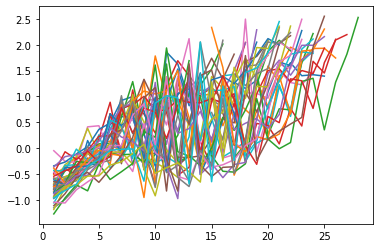

In [83]:
# for network in networks:
#     for number, organism in enumerate(organisms):
#         for size in sizes:
#             current_dir = os.path.join(topology_dir, network, organism, size)
#             for rep, file in enumerate(glob.glob(os.path.join(current_dir, '*sv'))):
#                 int_mat_g = f.return_interaction_matrix_graph(file, network, rep, size)
#                 G = nx.DiGraph(int_mat_g.T)
                
#                 x_values = []
#                 y_values = []
#                 degree_connectivity = nx.k_nearest_neighbors(G)
#                 degree_connectivity = dict(sorted(degree_connectivity.items()))
                
#                 for k, v in degree_connectivity.items():
#                     x_values.append(k)
#                     y_values.append(v)

#                 x_values = np.array(x_values)
#                 y_values = np.array(y_values)

#                 from matplotlib import pyplot as plt
#                 plt.plot(np.log10(x_values/y_values))

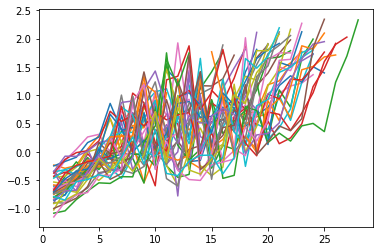

In [97]:
# corrupt_score = []
# for network in networks:
#     for number, organism in enumerate(organisms):
#         for size in sizes:
#             current_dir = os.path.join(topology_dir, network, organism, size)
#             for rep, file in enumerate(glob.glob(os.path.join(current_dir, '*sv'))):
#                 int_mat_g = f.return_interaction_matrix_graph(file, network, rep, size)
#                 int_mat_g_shuffled = f.get_shuffled_matrix(int_mat_g, 80000)
#                 G = nx.DiGraph(int_mat_g_shuffled.T)
#                 corrupt_score.append(1-f.corruption_score(int_mat_g, int_mat_g_shuffled))
#                 x_values = []
#                 y_values = []
#                 degree_connectivity = nx.k_nearest_neighbors(G)
#                 degree_connectivity = dict(sorted(degree_connectivity.items()))
                
#                 for k, v in degree_connectivity.items():
#                     x_values.append(k)
#                     y_values.append(v)

#                 x_values = np.array(x_values)
#                 y_values = np.array(y_values)

#                 from matplotlib import pyplot as plt
#                 plt.plot(np.log10(x_values/y_values))

In [98]:
# np.mean(corrupt_score)

0.7203398160323434

In [114]:
#mouse
edges = pd.read_csv(("../data/ori/trrust/trrust_rawdata.mouse.tsv"), sep="\t", header=None)[[0, 1]]
edges.columns = ["Tf", "Tg"]
nodes = sorted(np.unique(np.concatenate((edges.Tf.unique(), edges.Tg.unique()))))
nodes = pd.DataFrame(data=range(len(nodes)), index=nodes, columns=["idx"])
edges_ = edges.join(nodes, on="Tf").join(nodes, on="Tg", lsuffix="_tf", rsuffix="_tg")
np_edges = edges_[["idx_tg", "idx_tf"]].values
interaction_matrix_mouse = f.build_Tnet(np_edges, len(nodes))

# G = nx.DiGraph(interaction_matrix_mouse.T)
# nx.degree_pearson_correlation_coefficient(G)/nx.average_clustering(G)

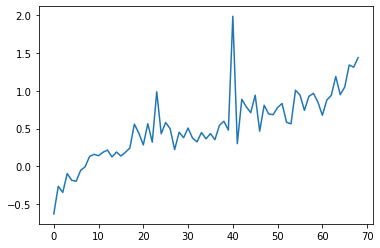

In [106]:
# G = nx.DiGraph(interaction_matrix_mouse.T)
# x_values = []
# y_values = []
# degree_connectivity = nx.k_nearest_neighbors(G)
# degree_connectivity = dict(sorted(degree_connectivity.items()))
                
# for k, v in degree_connectivity.items():
#     x_values.append(k)
#     y_values.append(v)

# x_values = np.array(x_values)
# y_values = np.array(y_values)

# from matplotlib import pyplot as plt
# plt.plot(np.log10(x_values/y_values))

0.912326656394453


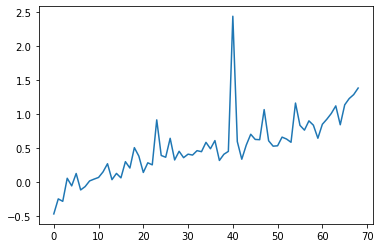

In [110]:
# interaction_matrix_mouse_shuffled = f.get_shuffled_matrix(interaction_matrix_mouse, 80000)
# G = nx.DiGraph(interaction_matrix_mouse_shuffled.T)
# #print(nx.degree_pearson_correlation_coefficient(G))
# #print(nx.average_clustering(G))
# print(1-f.corruption_score(interaction_matrix_mouse, interaction_matrix_mouse_shuffled))
# x_values = []
# y_values = []
# degree_connectivity = nx.k_nearest_neighbors(G)
# degree_connectivity = dict(sorted(degree_connectivity.items()))
                
# for k, v in degree_connectivity.items():
#     x_values.append(k)
#     y_values.append(v)

# x_values = np.array(x_values)
# y_values = np.array(y_values)

# from matplotlib import pyplot as plt
# plt.plot(np.log10(x_values/y_values))

In [115]:
#human
edges = pd.read_csv(("../data/ori/trrust/trrust_rawdata.human.tsv"), sep="\t", header=None)[[0, 1]]
edges.columns = ["Tf", "Tg"]
nodes = sorted(np.unique(np.concatenate((edges.Tf.unique(), edges.Tg.unique()))))
nodes = pd.DataFrame(data=range(len(nodes)), index=nodes, columns=["idx"])
edges_ = edges.join(nodes, on="Tf").join(nodes, on="Tg", lsuffix="_tf", rsuffix="_tg")
np_edges = edges_[["idx_tg", "idx_tf"]].values
interaction_matrix_human = f.build_Tnet(np_edges, len(nodes))

# G = nx.DiGraph(interaction_matrix_human.T)
# nx.degree_pearson_correlation_coefficient(G)/nx.average_clustering(G)

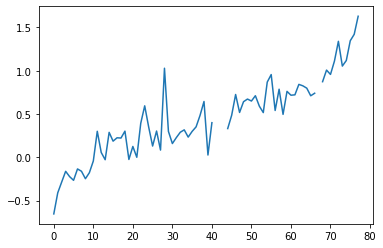

In [115]:
G = nx.DiGraph(interaction_matrix_human.T)
x_values = []
y_values = []
degree_connectivity = nx.k_nearest_neighbors(G)
degree_connectivity = dict(sorted(degree_connectivity.items()))
                
for k, v in degree_connectivity.items():
    x_values.append(k)
    y_values.append(v)

x_values = np.array(x_values)
y_values = np.array(y_values)

from matplotlib import pyplot as plt
plt.plot(np.log10(x_values/y_values))

0.8458526165895337


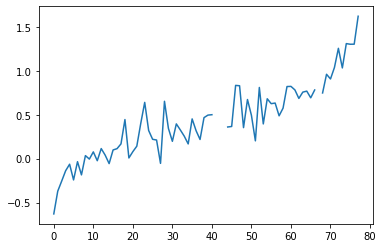

In [116]:
interaction_matrix_human_shuffled = f.get_shuffled_matrix(interaction_matrix_human, 80000)
G = nx.DiGraph(interaction_matrix_human_shuffled.T)
#print(nx.degree_pearson_correlation_coefficient(G))
#print(nx.average_clustering(G))
print(1-f.corruption_score(interaction_matrix_human, interaction_matrix_human_shuffled))
x_values = []
y_values = []
degree_connectivity = nx.k_nearest_neighbors(G)
degree_connectivity = dict(sorted(degree_connectivity.items()))
                
for k, v in degree_connectivity.items():
    x_values.append(k)
    y_values.append(v)

x_values = np.array(x_values)
y_values = np.array(y_values)

from matplotlib import pyplot as plt
plt.plot(np.log10(x_values/y_values))

## Create table

In [9]:
cfg = f.get_actual_parametrization("../src/config.json")
table1 = pd.DataFrame([f.collect_topological_parameters(cfg,interaction_matrix_ecoli, 'e.coli'),
                      f.collect_topological_parameters(cfg,interaction_matrix_yeast, 'yeast'),
                      f.collect_topological_parameters(cfg,interaction_matrix_mouse, 'mouse'),
                      f.collect_topological_parameters(cfg,interaction_matrix_human, 'human')], 
                  columns = ['ffl_node_participation' , 'sparsity', 'in-degree' , 'out-degree', 'organism']) 

table1.to_csv("../results/tables/table1.tsv", sep="\t", index=False)
table1

,ffl_node_participation,sparsity,in-degree,out-degree,organism
0,0.374,2.328,1.106,1.222,e.coli
1,0.270,2.899,1.421,1.477,yeast
2,0.315,2.643,1.274,1.369,mouse
3,0.347,2.944,1.364,1.580,human
